<center>DATA PREPARATION</center>
<br>
<center>oleh:</center>
<center>Bakhtiar Amaludin</center>
<center>I Gede Yudi Paramartha</center>

# Pengantar 

> Suatu proses yang dilakukan untuk membuat data mentah menjadi data yang berkualitas dan siap untuk digunakan dalam proses analisis atau permodelan. 

## Data preparation dalam CRISP-DM.

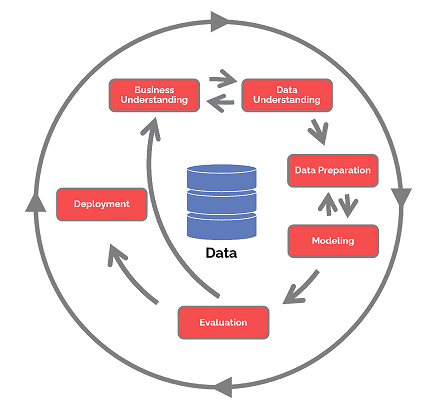



> The data preparation phase covers all activities to construct the final dataset (data that will be fed into the modeling tools) from the initial raw data. Data preparation tasks are likely to be ```performed multiple times and not in any prescribed order```. Tasks include table, record and attribute selection as well as transformation and cleaning of data for
modeling tools.

Sumber: Chapman et al (2000)

## Tugas yang memakan waktu

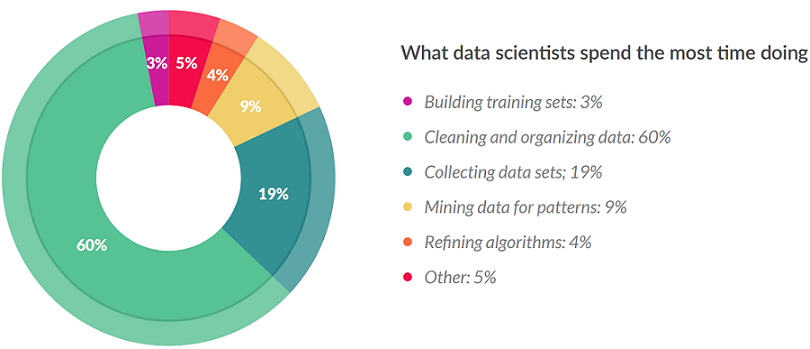

[Forbes](https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/?sh=3bc50d1f6f63) menyebutkan bahwa data preparation adalah pekerjaan yang paling membosankan dan menguras waktu, tenaga dan pikiran.

> Kunci: __SABAR !__ 

## Apa yang dikerjakan

> Get dataset, select data, clean data, construct data, integrate data, and format data Chapman et al (2000).

Dalam bentuk gambar: <br>
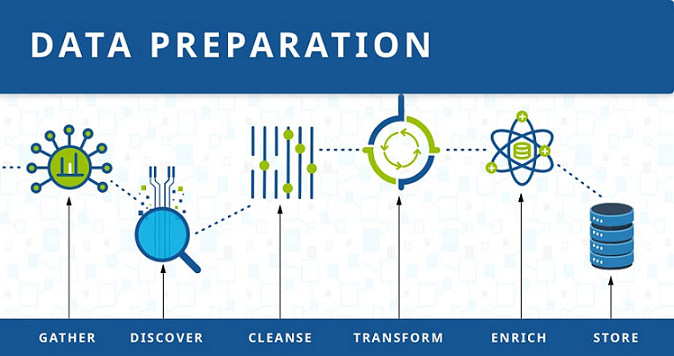 <br>

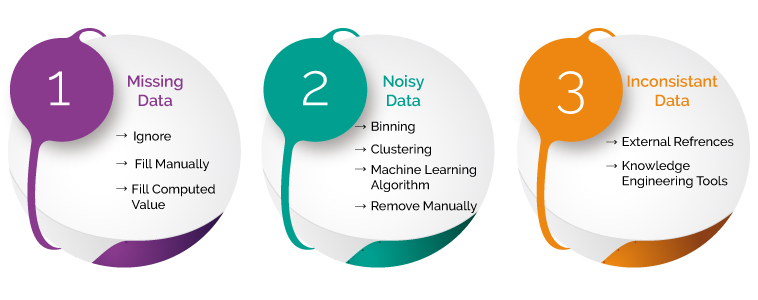


## Tools yang dibutuhkan

|Tools|Fungsi| 
|---|---|
|[Pandas](https://pandas.pydata.org/)|Mengolah dataset|
|[D-Tale](https://pypi.org/project/dtale/)|EDA secara simple|
|[Regular Expression](https://docs.python.org/3/howto/regex.html)|Ekstraksi atau pencocokan pola teks|
|[Bamboolib](https://bamboolib.8080labs.com/)|Manipulasi data dengan Pandas tanpa coding|
|[regex101](https://regex101.com/)|Playground untuk regex|
|[Scikit-learn](https://scikit-learn.org/stable/auto_examples/index.html)|Fungsi data preparation|
|[missingno](https://anaconda.org/conda-forge/missingno)|Visualisasi missing value|

In [1]:
# Load library
import pandas as pd
import dtale
import re
import missingno as msno

## Data yang digunakan

Kami tidak menggunakan single dataset untuk mendemokan semua proses pada data preparation. <br> 

Terdapat beberapa ragam dataset yang berbeda-beda sesuai dengan studi kasus. <br>

## Agenda hari ini

|Agenda|Yang dipelajari|
|---|---|
|Data Cleaning|Pemahaman mendalam tipe data, memperbaiki data dan bentuk DataFrame, menggabungkan DataFrame, menghapus duplicate data, menghapus missing data, dan membuat rekapitulasi data|
|Regular Expression|Pemahaman regex token, menggunakan library RegEx, dan mengaplikasikan RegEx di Pandas|
|EDA (Review Materi Sebelumnya)|Apa itu EDA dan EDA dengan D-Tale|
|Feature Engineering|Ekstaksi inisial dari kolom Name dan pengelompokkan penumpang berdasarkan kolom Age|
|Encoding|Merubah kolom Sex, Embarked, Initial, dan Age_group menjadi numerik|

# Data Cleaning

## Memahami Tipe Data

Sekilas tentang Tipe Data di Pandas 

|Pandas dtype|Python type|NumPy type|Usage|
|--- |--- |--- |---|
|object|str or mixed|string_, unicode_, mixed types|Text or mixed numeric and non-numeric values|
|int64|int|int_, int8, int16, int32, int64, uint8, uint16, uint32, uint64|Integer numbers|
|float64|float|float_, float16, float32, float64|Floating point numbers|
|bool|bool|bool_|True/False values|
|datetime64|NA|datetime[ns]|Date and time values|
|timedelta[ns]|NA|NA|Differences between two datetimes|
|category|NA|NA|Finite list of text values|

## Memperbaiki Data

Seringkali dataset yang kita peroleh format datanya masih tidak sesuai dengan yang diharapkan, misalnya ada kolom yang berisi nilai uang namun dianggap sebagai string karena ada simbol mata uang di depannya. 

Ada juga mengenai data yang disajikan tidak konsisten.


__Contoh Kasus:__

In [2]:
# Load file menjadi dataset
# Diberi nama df_case1

df_case1 = pd.read_csv('sales_data_types.csv')
df_case1

,Customer Number,Customer Name,Address,Type,Sales,Percent Growth
0,100025,Quest Industry,Jakarta,Company,Rp.162500000.00,30.00%
1,552278,Smith Plumbing,Bandung,Company,"Rp101.200.000,00",10.00%
2,234775,ACME Industrial,Jakarta,Perusahaan,62500000,25
3,249000,Brekke LTD,"Pasteur, Bandung",Company,Rp4900000.00,4.00%
4,651029,Harbor Co,"Cilincing, Jakarta",Company,Rp12750000.00,-15.00%
5,565600,Berkah Jaya,Bandung,Perusahaan,Rp 762500000,30.00%
6,897440,Rafee Ahmad,Depok,Personal,"Rp12,200,000.00",10.00%
7,123156,Gede Yudi,Jakarta,Personal,50000000.00,25
8,138135,PT Berdikari,"Kebayoran Lama, Jakarta",Perusahaan,Rp9000000.00,4.00%
9,748952,Alexander Samiun,"Sleman, Jogjakarta",Individu,IDR 127450000,-15.00%


In [3]:
# mengecek jenis tipe data
# dapat dilihat bahwa mayoritas data bertipe object
df_case1.dtypes

Customer Number     int64
Customer Name      object
Address            object
Type               object
Sales              object
Percent Growth     object
dtype: object

In [4]:
# Melakukan pengecekan lebih dalam terkait tipe data
# Bahwa ada tipe data yang tercampur di kolom Customer Number, Customer Name, Address, dan Type
df_case1.applymap(type).apply(pd.Series.value_counts)

,Customer Number,Customer Name,Address,Type,Sales,Percent Growth
<class 'int'>,10.0,NaN,NaN,NaN,NaN,NaN
<class 'str'>,NaN,10.0,10.0,10.0,10.0,10.0


**Penanganan:**

In [5]:
# Customer Number menjadi string 
df_case1['Customer Number'] = df_case1['Customer Number'].astype(str)

In [6]:
# Untuk kolom Sales, Percent Growth, Addres
# Perlu melakukan pengecekan terkait konsistensi penulisan
# Atas pemahaman tersebut, baru dilakukan pilihan penanganan

# Sales menjadi float64 
# (1) penulisan Rp, (2) penulisan titik koma, dan (3) penulisan ,00
df_case1['Sales'] = df_case1['Sales'].str.replace('(Rp|Rp\.|IDR )','', regex=True)
df_case1['Sales'] = df_case1['Sales'].str.replace('[\.,](\d{3})','\\1', regex=True)
df_case1['Sales'] = df_case1['Sales'].str.replace(',00','.00', regex=True)
df_case1['Sales'] = df_case1['Sales'].astype(float)

In [7]:
# Percent Growth menjadi float64 
# Tanda % dihilangkan
df_case1['Percent Growth'] = df_case1['Percent Growth'].str.replace('%','', regex=False)
df_case1['Percent Growth'] = df_case1['Percent Growth'].astype(float)

In [8]:
# Hanya mengambil Kota saja, info atas detail alamat dihilangkan
df_case1['Address'] = df_case1['Address'].str.replace('\D+,','', regex=True)

In [9]:
# Sedangkan untuk kolom Type
# Melakukan penyesuaian atas konsisten penulisan kategoriny
# Merubah penulisan Company dan Individu
df_case1['Type'] = df_case1['Type'].replace({'Company':'Perusahaan','Individu':'Personal'})

In [10]:
# print dataset setelah penanganan
df_case1

,Customer Number,Customer Name,Address,Type,Sales,Percent Growth
0,100025,Quest Industry,Jakarta,Perusahaan,162500000.0,30.0
1,552278,Smith Plumbing,Bandung,Perusahaan,101200000.0,10.0
2,234775,ACME Industrial,Jakarta,Perusahaan,62500000.0,25.0
3,249000,Brekke LTD,Bandung,Perusahaan,4900000.0,4.0
4,651029,Harbor Co,Jakarta,Perusahaan,12750000.0,-15.0
5,565600,Berkah Jaya,Bandung,Perusahaan,762500000.0,30.0
6,897440,Rafee Ahmad,Depok,Personal,12200000.0,10.0
7,123156,Gede Yudi,Jakarta,Personal,50000000.0,25.0
8,138135,PT Berdikari,Jakarta,Perusahaan,9000000.0,4.0
9,748952,Alexander Samiun,Jogjakarta,Personal,127450000.0,-15.0


In [11]:
# print type setelah penanganan
df_case1.dtypes

Customer Number     object
Customer Name       object
Address             object
Type                object
Sales              float64
Percent Growth     float64
dtype: object

## Memperbaiki Bentuk DataFrame

Selain tipe data, bentuk dataset yang kita punya/peroleh juga kadang bermasalah. 

Dalam hal ini, kita harus memperbaiki dulu untuk membuatnya mudah dianalisis.

__Contoh Kasus:__

In [12]:
# Load file menjadi dataset
# Diberi nama df_case2

df_case2 = pd.read_excel('sales.xlsx')
df_case2.head(5)

# Disini akan terlihat di awal kalau kolom sangat membingungkan

,Ship Mode,First Class,Unnamed: 2,Unnamed: 3,Same Day,Unnamed: 5,Unnamed: 6,Second Class,Unnamed: 8,Unnamed: 9,Standard Class,Unnamed: 11,Unnamed: 12
0,Segment,Consumer,Corporate,Home Office,Consumer,Corporate,Home Office,Consumer,Corporate,Home Office,Consumer,Corporate,Home Office
1,Order Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-03-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.056
3,2013-12-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,129.44,NaN,NaN,NaN,NaN,NaN
4,2013-06-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,605.47,NaN,NaN


In [13]:
# Kita menggunakan dua baris teratas sebagai header
df_case2 = pd.read_excel('sales.xlsx', header=[0, 1])
df_case2.head(5)

Ship Mode First Class                       Same Day            \
               Segment    Consumer Corporate Home Office Consumer Corporate   
0           Order Date         NaN       NaN         NaN      NaN       NaN   
1  2013-03-14 00:00:00         NaN       NaN         NaN      NaN       NaN   
2  2013-12-16 00:00:00         NaN       NaN         NaN      NaN       NaN   
3  2013-06-02 00:00:00         NaN       NaN         NaN      NaN       NaN   
4  2013-10-21 00:00:00         NaN       NaN         NaN      NaN       NaN   

              Second Class                       Standard Class            \
  Home Office     Consumer Corporate Home Office       Consumer Corporate   
0         NaN          NaN       NaN         NaN            NaN       NaN   
1         NaN          NaN       NaN         NaN            NaN       NaN   
2         NaN       129.44       NaN         NaN            NaN       NaN   
3         NaN          NaN       NaN         NaN         605.47       NaN   
4         NaN          NaN       NaN         NaN            NaN    788.86   

               
  Home Office  
0         NaN  
1      91.056  
2         NaN  
3         NaN  
4         NaN

Terlihat lebih baik, namun masih perlu diperbaiki

In [14]:
# Hapus baris ke 0, karena baris Order Date tidak memberikan value lebih
# Menggunakan fungsi .iloc[]
df_case2 = df_case2.iloc[1:]
df_case2.head(3)

Ship Mode First Class                       Same Day            \
               Segment    Consumer Corporate Home Office Consumer Corporate   
1  2013-03-14 00:00:00         NaN       NaN         NaN      NaN       NaN   
2  2013-12-16 00:00:00         NaN       NaN         NaN      NaN       NaN   
3  2013-06-02 00:00:00         NaN       NaN         NaN      NaN       NaN   

              Second Class                       Standard Class            \
  Home Office     Consumer Corporate Home Office       Consumer Corporate   
1         NaN          NaN       NaN         NaN            NaN       NaN   
2         NaN       129.44       NaN         NaN            NaN       NaN   
3         NaN          NaN       NaN         NaN         605.47       NaN   

               
  Home Office  
1      91.056  
2         NaN  
3         NaN

__Ilustrasi Melt__

<img src="ezgif-7-9d489369623a.gif"/>

In [15]:
# Pandas menyediakan fungsi .melt()
# .melt() melakukan unpivot dengan membuat wide dataframe menjadi long dataframe
# Variable menggunakan kolom dengan index 0, Ship Mode dan Segment
df_case2_melted = df_case2.melt(id_vars=[df_case2.columns[0]])
df_case2_melted.sample(5)

,"(Ship Mode, Segment)",variable_0,variable_1,value
1992,2015-09-13,First Class,Home Office,NaN
529,2016-07-27,First Class,Consumer,NaN
4766,2016-01-22,Same Day,Home Office,NaN
4505,2015-05-31,Same Day,Home Office,NaN
24,2013-01-21,First Class,Consumer,NaN


In [16]:
# Hapus kolom value yang kosong
df_case2_melted.dropna(subset=['value'], inplace=True)
df_case2_melted.reindex()

# Sesuaikan penamaan kolom
df_case2_melted.columns = ['Order Date','Shiping Method', 'Consumer Type','Value']

In [17]:
# Print dataframe setelah penanganan
df_case2_melted.sample(3)

,Order Date,Shiping Method,Consumer Type,Value
1379,2016-04-01,First Class,Corporate,127.950
5347,2015-08-16,Second Class,Consumer,225.296
9185,2014-09-22,Standard Class,Home Office,763.508


> Kasus seperti ini pastinya akan sering terjadi. Contoh di atas bukan resep satu untuk semua karena kasus masing-masing unik. Pandas menyediakan beberapa fungsi untuk menangani permasalahan bentuk dataset yang bermasalah. Anda bisa mengecek beberapa fungsi seperti [reshape](https://pandas.pydata.org/docs/user_guide/reshaping.html), [melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) dsb.

## Menggabungkan Dua DataFrame 

Jika kita memiliki data yang tersebar ke dalam beberapa atau banyak file dan ingin menganalisisnya secara gabungan. 

Pandas menyediakan berbagai metode untuk menggabungkan dataframe seperti ```.join()``` dan ```.concat()```.

__Contoh Kasus:__

Sumber: https://data.jakarta.go.id/

In [18]:
# Load file satu menjadi dataset
# Diberi nama df_case_bumd2017

df_case_bumd2017 = pd.read_csv('bumd2017.csv')
df_case_bumd2017

,tahun,nama_bumd,nama_akun,nilai,keterangan
0,2017,PD AM Jaya,Aset,1360142767,NaN
1,2017,PD AM Jaya,Ekuitas,-509895627,NaN
2,2017,PD AM Jaya,Pendapatan Usaha,2796561019,NaN
3,2017,PD AM Jaya,Laba Usaha,122739741,NaN
4,2017,PD AM Jaya,Laba Bersih,131375112,NaN
...,...,...,...,...,...
100,2017,PT Grahasari Suryajaya,Aset,328730722,Data tidak tersedia
101,2017,PT Grahasari Suryajaya,Ekuitas,123856419,Data tidak tersedia
102,2017,PT Grahasari Suryajaya,Pendapatan Usaha,67104107,Data tidak tersedia
103,2017,PT Grahasari Suryajaya,Laba Usaha,428926,Data tidak tersedia


In [19]:
# Load file dua menjadi dataset
# Diberi nama df_case_bumd2018
df_case_bumd2018 = pd.read_csv('bumd2018.csv')
df_case_bumd2018

,tahun,nama_bumd,nama_akun,nilai,keterangan
0,2018,PD AM Jaya,Aset,1.487470e+09,NaN
1,2018,PD AM Jaya,Ekuitas,-3.099618e+08,NaN
2,2018,PD AM Jaya,Pendapatan Usaha,2.902988e+09,NaN
3,2018,PD AM Jaya,Laba Usaha,1.787775e+08,NaN
4,2018,PD AM Jaya,Laba Bersih,1.995425e+08,NaN
...,...,...,...,...,...
110,2018,PT Transportasi Jakarta,Aset,NaN,Data Belum Tersedia.
111,2018,PT Transportasi Jakarta,Ekuitas,NaN,Data Belum Tersedia.
112,2018,PT Transportasi Jakarta,Pendapatan Usaha,NaN,Data Belum Tersedia.
113,2018,PT Transportasi Jakarta,Laba Usaha,NaN,Data Belum Tersedia.


#### [Concatenate](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)

In [20]:
pd.concat([df_case_bumd2017, df_case_bumd2018],axis=0)

,tahun,nama_bumd,nama_akun,nilai,keterangan
0,2017,PD AM Jaya,Aset,1360142767,NaN
1,2017,PD AM Jaya,Ekuitas,-509895627,NaN
2,2017,PD AM Jaya,Pendapatan Usaha,2796561019,NaN
3,2017,PD AM Jaya,Laba Usaha,122739741,NaN
4,2017,PD AM Jaya,Laba Bersih,131375112,NaN
...,...,...,...,...,...
110,2018,PT Transportasi Jakarta,Aset,NaN,Data Belum Tersedia.
111,2018,PT Transportasi Jakarta,Ekuitas,NaN,Data Belum Tersedia.
112,2018,PT Transportasi Jakarta,Pendapatan Usaha,NaN,Data Belum Tersedia.
113,2018,PT Transportasi Jakarta,Laba Usaha,NaN,Data Belum Tersedia.


#### [Append](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html)

In [21]:
df_case_bumd2017.append(df_case_bumd2018)

,tahun,nama_bumd,nama_akun,nilai,keterangan
0,2017,PD AM Jaya,Aset,1360142767,NaN
1,2017,PD AM Jaya,Ekuitas,-509895627,NaN
2,2017,PD AM Jaya,Pendapatan Usaha,2796561019,NaN
3,2017,PD AM Jaya,Laba Usaha,122739741,NaN
4,2017,PD AM Jaya,Laba Bersih,131375112,NaN
...,...,...,...,...,...
110,2018,PT Transportasi Jakarta,Aset,NaN,Data Belum Tersedia.
111,2018,PT Transportasi Jakarta,Ekuitas,NaN,Data Belum Tersedia.
112,2018,PT Transportasi Jakarta,Pendapatan Usaha,NaN,Data Belum Tersedia.
113,2018,PT Transportasi Jakarta,Laba Usaha,NaN,Data Belum Tersedia.


#### [Merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html)

In [22]:
# Buat dataframe skenario 1
# Copy dari df_case_bumd2017, diberi nama df_case_bumd2017_laba
df_case_bumd2017_laba = df_case_bumd2017[df_case_bumd2017.nama_akun == 'Laba Bersih'].copy()

# Drop kolom nama_akun, keterangan, dan tahun
df_case_bumd2017_laba.drop(columns=['nama_akun','keterangan','tahun'], inplace=True)

# Rename kolom menjadi nama_bumd dan nilai2017
# Simpan dalam bentuk file .csv
df_case_bumd2017_laba.columns = ['nama_bumd', 'nilai2017']
df_case_bumd2017_laba.to_csv('bumd_laba_2017.csv')

# Buat dataframe skenario 2
# Copy dari df_case_bumd2018, diberi nama df_case_bumd2018_laba
df_case_bumd2018_laba = df_case_bumd2018[df_case_bumd2018.nama_akun == 'Laba Bersih'].copy()

# Drop kolom nama_akun, keterangan, dan tahun
df_case_bumd2018_laba.drop(columns=['nama_akun','keterangan','tahun'], inplace=True)

# Rename kolom menjadi nama_bumd dan nilai2018
# Simpan dalam bentuk file .csv
df_case_bumd2018_laba.columns = ['nama_bumd', 'nilai2018']
df_case_bumd2018_laba.to_csv('bumd_laba_2018.csv')

In [23]:
# Print hasil skenario 1
df_case_bumd2017_laba.sample(3)

,nama_bumd,nilai2017
79,PT Cemani Toka,23101841
9,PD Dharma Jaya,-
54,PT Transportasi Jakarta,261897622


In [24]:
# Print hasil skenario 2
df_case_bumd2018_laba.sample(3)

,nama_bumd,nilai2018
69,PT Jakarta Propertindo (Perseroda),NaN
9,PD Dharma Jaya,1.454401e+07
24,Perumda Pembangunan Sarana Jaya,1.765353e+08


In [25]:
# .merge() bisa melakukan setting parameter atas kolom yang di merge dan metode mergenya
# Contoh kasus ini menggunakan metode inner
df_case_bumd2017_laba.merge(df_case_bumd2018_laba, left_on='nama_bumd', right_on='nama_bumd', how="inner").head(10)

,nama_bumd,nilai2017,nilai2018
0,PD AM Jaya,131375112,1.995425e+08
1,PD Dharma Jaya,-,1.454401e+07
2,PD PAL Jaya,39174547,4.273300e+07
3,PT Food Station Tjipinang Jaya,16238344,3.023541e+07
4,PT Bank DKI,712177000,8.003070e+08
5,PT Jakarta Tourisindo,-19723289,-1.545650e+07
6,PT Transportasi Jakarta,261897622,NaN
7,PT Jamkrida Jakarta,4262414,8.730033e+06
8,PT Jakarta Industrial Estate Pulogadung (Persero),85894997,1.162282e+08
9,PT Pembangunan Jaya,1490103079,1.507277e+09


#### [Join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html#pandas.DataFrame.join)

In [26]:
# Join ke kanan
# Kita beri tambahan nama, agar membedakan antara skenario 1 dan skenario 2
df_case_bumd2017_laba.join(df_case_bumd2018_laba, lsuffix='_caller', rsuffix='_other').sample(3)

,nama_bumd_caller,nilai2017,nama_bumd_other,nilai2018
84,PT Asuransi Bangun Askrida,167735091,PT Kawasan Berikat Nusantara (Persero),1.497844e+08
24,PD PAL Jaya,39174547,Perumda Pembangunan Sarana Jaya,1.765353e+08
9,PD Dharma Jaya,-,PD Dharma Jaya,1.454401e+07


In [27]:
# Join ke bawah
# Kolom yang kita join adalah nama_bumd
# Akan ada NaN karena nilai 2017 hanya ada di kolom dia, begitu juga dengan nilai 2018
df_case_bumd2017_laba.join(df_case_bumd2018_laba.set_index('nama_bumd'), on='nama_bumd').head(3)

,nama_bumd,nilai2017,nilai2018
4,PD AM Jaya,131375112,1.995425e+08
9,PD Dharma Jaya,-,1.454401e+07
14,PD Pasar Jaya,93518089,NaN


## Menghapus Duplicate Data

Menghapus data duplikat menggunakan fungsi [.drop_duplicates()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html).

__Contoh Kasus:__

Kita akan gunakan data dari contoh sebelumnya.

> keep = {‘first’, ‘last’, False}

In [28]:
# parameter 'first' artinya akan menyimpan nilai pertama kali ditemukan, jika ada yang duplicate
df_case_bumd2017.drop_duplicates(subset=['nama_bumd'],keep='first').sample(3)

,tahun,nama_bumd,nama_akun,nilai,keterangan
25,2017,PT Food Station Tjipinang Jaya,Aset,561170417,NaN
20,2017,PD PAL Jaya,Aset,716222145,NaN
100,2017,PT Grahasari Suryajaya,Aset,328730722,Data tidak tersedia


## Menghapus Missing Data

Menghapus missing data bisa menggunakan fungsi ```.dropna()```. 

__Contoh Kasus:__

Kita akan gunakan data dari contoh sebelumnya.

In [29]:
df_case_bumd2017.dropna(subset=['keterangan']).sample(3)

,tahun,nama_bumd,nama_akun,nilai,keterangan
8,2017,PD Dharma Jaya,Laba Usaha,-,Data belum tersedia
104,2017,PT Grahasari Suryajaya,Laba Bersih,-24778141,Data tidak tersedia
5,2017,PD Dharma Jaya,Aset,-,Data belum tersedia


> Penanganan missing value sedikit lebih kompleks ketika melakukan analisis data __(tidak sekedar menghapus)__. Hal ini akan dibahas nanti di kasus titanic.

## Membuat Rekapitulasi Data

In [30]:
# Penting untuk membuat resume atas data sebagai tambahan understanding kita
# Kita akan melakukan grouping dari df_case2_melted
# Menggunakan fungsi Sum, Count dan Mean sebagai value
df_case_group1 = df_case2_melted.groupby(by=['Shiping Method','Consumer Type']).agg(['sum','count','mean'])
df_case_group1

Value                   
                                      sum count         mean
Shiping Method Consumer Type                                
First Class    Consumer        20802.1730    72   288.919069
               Corporate       20792.6070    40   519.815175
               Home Office      7737.7860    12   644.815500
Same Day       Consumer         8132.4090    28   290.443179
               Corporate        9907.3080     5  1981.461600
               Home Office      2977.4560     6   496.242667
Second Class   Consumer        49724.2545    91   546.420379
               Corporate       35243.2310    50   704.864620
               Home Office      8791.1270    23   382.222913
Standard Class Consumer       116922.1345   253   462.142824
               Corporate       55942.7865   152   368.044648
               Home Office     54748.6325    90   608.318139

In [31]:
# Untuk mengisi data yang kosong pada kolom yang sama
# Kita bisa menggunakan fungsi .reset_index()
df_case_group1.reset_index(inplace=True)
df_case_group1.sample(3)

Shiping Method Consumer Type       Value                  
                                       sum count        mean
8   Second Class   Home Office   8791.1270    23  382.222913
6   Second Class      Consumer  49724.2545    91  546.420379
7   Second Class     Corporate  35243.2310    50  704.864620

# Regular Expression

Regex merupakan sebuah teks (string) yang mendefinisikan sebuah pola pencarian sehingga dapat membantu kita untuk melakukan matching (pencocokan), locate (pencarian), dan manipulasi teks.


## RegEx Token


__Special characters__

<table>
  <tbody><tr>
    <td class="key_td"><code>\</code></td>
    <td>escape special characters</td>
  </tr>
  <tr>
    <td class="key_td"><code>.</code></td>
    <td>matches any character</td>
  </tr>
  <tr>
    <td class="key_td"><code>^</code></td>
    <td>matches beginning of string</td>
  </tr>
  <tr>
    <td class="key_td"><code>$</code></td>
    <td>matches end of string</td>
  </tr>
  <tr>
    <td class="key_td"><code>[5b-d]</code></td>
    <td>matches any chars '5', 'b', 'c' or 'd'</td>
  </tr>
  <tr>
    <td class="key_td"><code>[^a-c6]</code></td>
    <td>matches any char except 'a', 'b', 'c' or '6'</td>
  </tr>
  <tr>
    <td class="key_td"><code>R|S</code></td>
    <td>matches either regex <code>R</code> or regex <code>S</code></td>
  </tr>
  <tr>
    <td class="key_td"><code>()</code></td>
    <td>creates a capture group and indicates precedence</td>
  </tr>
</tbody></table>

__Special sequences__

<table>
<tbody><tr>
<td class="key_td"><code>\A</code></td>
<td>start of string</td>
</tr>
<tr>
<td class="key_td"><code>\b</code></td>
<td>matches empty string at word boundary (between <code>\w</code> and <code>\W</code>)</td>
</tr>
<tr>
<td class="key_td"><code>\d</code></td>
<td>digit</td>
</tr>
<tr>
<td class="key_td"><code>\s</code></td>
<td>whitespace: <code>[ \t\n\r\f\v]</code></td>
</tr>
<tr>
<td class="key_td"><code>\w</code></td>
<td>alphanumeric: <code>[0-9a-zA-Z_]</code></td>
</tr>
</tbody></table>

                    
__Quantifiers__

<table>
  <tbody><tr>
    <td class="key_td"><code>*</code></td>
    <td>0 or more (append <code>?</code> for non-greedy)</td>
  </tr>
  <tr>
    <td class="key_td"><code>+</code></td>
    <td>1 or more (append <code>?</code> for non-greedy)</td>
  </tr>
  <tr>
    <td class="key_td"><code>?</code></td>
    <td>0 or 1 (append <code>?</code> for non-greedy)</td>
  </tr>
  <tr>
    <td class="key_td"><code>{m}</code></td>
    <td>exactly <code>m</code>m occurrences</td>
  </tr>
  <tr>
    <td class="key_td"><code>{m, n}</code></td>
    <td>from <code>m</code> to <code>n</code>. <code>m</code> defaults to 0, <code>n</code> to infinity</td>
  </tr>
  <tr>
    <td class="key_td"><code>{m, n}?</code></td>
    <td>from <code>m</code> to <code>n</code>, as few as possible</td>
  </tr>
</tbody></table>

## Menggunakan Library RegEx 

In [32]:
# library untuk regex di python
import re

#### Pencarian

Teks:

> Bisnis.com, JAKARTA - Sejumlah saham berhasil meningkat signifikan pada pekan kedua Agustus 2021, perdagangan 9-13 Agustus 2021, di tengah pelemahan Indeks Harga Saham Gabungan (IHSG). Mengutip data Bursa Efek Indonesia (BEI), ada 10 saham yang paling melonjak sepekan. Saham PT FKS Multi Agro Tbk. (FISH) memimpin dengan peningkatan 106,62 persen menjadi Rp14.050 dari sebelumnya Rp6.800. Selanjutnya, saham PT Panca Global Kapital Tbk. (PEGE) naik 93,33 persen menuju Rp1.015 dari sebelumnya Rp525. Saham PT Capitol Nusantara Tbk. (CANI) naik 88,79 persen menuju Rp202 dari sebelumnya Rp107. (WEHA) meningkat 80,36 persen menjadi Rp202 dari sebelumnya Rp112. Saham PT Indo Komoditi Corpora Tbk. (INCF) melaju 71,05 persen menuju Rp195 pekan lalu Rp114. Saham PT Indosterling Technomedia Tbk. (TECH) juga melonjak 64,06 persen menjadi Rp5.775 dari sebelumnya Rp3.520. Perusahaan media digital, PT Arkadia Digital Media Tbk. (DIGI) sahamnya melompat 55,3 persen menuju Rp615. Sementara itu, mengutip keterangan resmi Bursa Efek Indonesia (BEI), pada pekan kedua bulan Agustus 2021, data perdagangan BEI menunjukkan bahwa rata-rata nilai transaksi harian (RNTH) mencatatkan peningkatan sebesar 3,64 persen menjadi Rp15,6 triliun dari Rp15,05 triliun pada pekan lalu. Baca Juga : BEI: Sepekan IHSG Turun 1 Persen, Transaksi Harian Naik Jadi Rp15,6 Triliun "IHSG selama sepekan mengalami penurunan 1,03 persen atau berada pada level 6.139,49 dari posisi 6.203,43 pada pekan sebelumnya," papar keterangan BEI. Penurunan sebesar 1,08 persen terjadi pada nilai kapitalisasi pasar Bursa selama sepekan, menjadi sebesar Rp7.400,66 triliun dari Rp7.481,27 triliun dari sepekan yang lalu.

Link : [Sumber Teks](https://market.bisnis.com/read/20210814/7/1429669/saham-saham-paling-melesat-sepekan-ada-yang-naik-106-persen.)

In [33]:
teks = open('berita.txt','r').read()

# Mencari semua kode perusahaan
re.findall(r"[A-Z]{4}",teks) 

['JAKA',
 'IHSG',
 'FISH',
 'PEGE',
 'CANI',
 'WEHA',
 'INCF',
 'TECH',
 'DIGI',
 'RNTH',
 'IHSG',
 'IHSG']

In [34]:
# Mencari semua nama Perusahaan 
re.findall(r"PT.*?Tbk\.",teks)

['PT FKS Multi Agro Tbk.',
 'PT Panca Global Kapital Tbk.',
 'PT Capitol Nusantara Tbk.',
 'PT Indo Komoditi Corpora Tbk.',
 'PT Indosterling Technomedia Tbk.',
 'PT Arkadia Digital Media Tbk.']

In [35]:
# Mencari semua rupiah
re.findall(r"(Rp.*?)[\s]",teks)

['Rp14.050',
 'Rp6.800.',
 'Rp1.015',
 'Rp525.',
 'Rp202',
 'Rp107.',
 'Rp202',
 'Rp112.',
 'Rp195',
 'Rp114.',
 'Rp5.775',
 'Rp3.520.',
 'Rp615.',
 'Rp15,6',
 'Rp15,05',
 'Rp15,6',
 'Rp7.400,66',
 'Rp7.481,27']

#### Pencocokan

In [36]:
# Melakukan pencocokan pola
# Pola satu di tes padd email
# JIka sesuai akan di print 'Oke'
test = re.match(r'[a-zA-Z].*@gmail\.go\.id','gede86yudi@gmail.go.id')

if test:
    print('Oke')
else:
    print('Salah')

Oke


#### Replace/Substitusi

In [37]:
# Melakukan substitusi
# penulisan persen diganti %
re.sub(r'(\d)\spersen','\\1 %',teks)

'Bisnis.com, JAKARTA - Sejumlah saham berhasil meningkat signifikan pada pekan kedua Agustus 2021, perdagangan 9-13 Agustus 2021, di tengah pelemahan Indeks Harga Saham Gabungan (IHSG). Mengutip data Bursa Efek Indonesia (BEI), ada 10 saham yang paling melonjak sepekan. Saham PT FKS Multi Agro Tbk. (FISH) memimpin dengan peningkatan 106,62 % menjadi Rp14.050 dari sebelumnya Rp6.800. Selanjutnya, saham PT Panca Global Kapital Tbk. (PEGE) naik 93,33 % menuju Rp1.015 dari sebelumnya Rp525. Saham PT Capitol Nusantara Tbk. (CANI) naik 88,79 % menuju Rp202 dari sebelumnya Rp107. (WEHA) meningkat 80,36 % menjadi Rp202 dari sebelumnya Rp112. Saham PT Indo Komoditi Corpora Tbk. (INCF) melaju 71,05 % menuju Rp195 pekan lalu Rp114. Saham PT Indosterling Technomedia Tbk. (TECH) juga melonjak 64,06 % menjadi Rp5.775 dari sebelumnya Rp3.520. Perusahaan media digital, PT Arkadia Digital Media Tbk. (DIGI) sahamnya melompat 55,3 % menuju Rp615. Sementara itu, mengutip keterangan resmi Bursa Efek Indone

In [38]:
# Melakukan substitusi
# penulisan Rp diganti IDR
re.sub(r'Rp(\d)','IDR\\1',teks)

'Bisnis.com, JAKARTA - Sejumlah saham berhasil meningkat signifikan pada pekan kedua Agustus 2021, perdagangan 9-13 Agustus 2021, di tengah pelemahan Indeks Harga Saham Gabungan (IHSG). Mengutip data Bursa Efek Indonesia (BEI), ada 10 saham yang paling melonjak sepekan. Saham PT FKS Multi Agro Tbk. (FISH) memimpin dengan peningkatan 106,62 persen menjadi IDR14.050 dari sebelumnya IDR6.800. Selanjutnya, saham PT Panca Global Kapital Tbk. (PEGE) naik 93,33 persen menuju IDR1.015 dari sebelumnya IDR525. Saham PT Capitol Nusantara Tbk. (CANI) naik 88,79 persen menuju IDR202 dari sebelumnya IDR107. (WEHA) meningkat 80,36 persen menjadi IDR202 dari sebelumnya IDR112. Saham PT Indo Komoditi Corpora Tbk. (INCF) melaju 71,05 persen menuju IDR195 pekan lalu IDR114. Saham PT Indosterling Technomedia Tbk. (TECH) juga melonjak 64,06 persen menjadi IDR5.775 dari sebelumnya IDR3.520. Perusahaan media digital, PT Arkadia Digital Media Tbk. (DIGI) sahamnya melompat 55,3 persen menuju IDR615. Sementara 

## Mengaplikasikan RegEx di Pandas

#### Pencocokan

In [39]:
#  matching
df_case_bumd2017_laba[df_case_bumd2017_laba['nama_bumd'].str.match(r"^PD.*?Jaya")]

,nama_bumd,nilai2017
4,PD AM Jaya,131375112
9,PD Dharma Jaya,-
14,PD Pasar Jaya,93518089
19,PD Pembangunan Sarana Jaya,119436680
24,PD PAL Jaya,39174547


#### Ekstraksi

In [40]:
#  extract
df_case_bumd2017_laba.nama_bumd.str.extract(r"^(PD.*?Jaya)").head()

,0
4,PD AM Jaya
9,PD Dharma Jaya
14,PD Pasar Jaya
19,PD Pembangunan Sarana Jaya
24,PD PAL Jaya


#### Replace

In [41]:
# Mengganti PT atau PD dengan spasi kosong
df_case_bumd2017_laba['nama_bumd'].str.replace(r"^(PT|PD)",r"",regex=True).sample(3)

9           Dharma Jaya
4               AM Jaya
69     Pembangunan Jaya
Name: nama_bumd, dtype: object

In [42]:
df_case_bumd2017_laba.nama_bumd.apply(lambda x: re.sub("^(PT|PD)", "", x)).sample(3)

64     Jakarta Industrial Estate Pulogadung (Persero)
94                                       Ratax Armada
29                        Food Station Tjipinang Jaya
Name: nama_bumd, dtype: object

# EDA (Review Materi Sebelumnya)

## Apa itu EDA

> [Exploratory Data Analysis (EDA)](https://www.itl.nist.gov/div898/handbook/eda/section1/eda1.htm) adalah sebuah pendekatan untuk memahami data. EDA dilakukan dengan pendekatan statistik maupun visual. 


Dengan melakukan EDA, berikut manfaat yang diperoleh:
1. Memahami permasalahan yang ada pada data kita, sehingga dapat merencanakan langkah-langkah data cleansing (pada step data preparation)
2. Merumuskan pertanyaan-pertanyaan bisnis lain, sehingga dapat mempertajam pertanyaan bisnis yang merupakan hasil dari step data understanding
3. Menghasilkan output berupa hasil analisis deskriptif yang dapat disajikan pada visualisasi data dan dashboard. Output ini kadang terasa cukup sebagai bahan pertimbangan pengambilan keputusan. 

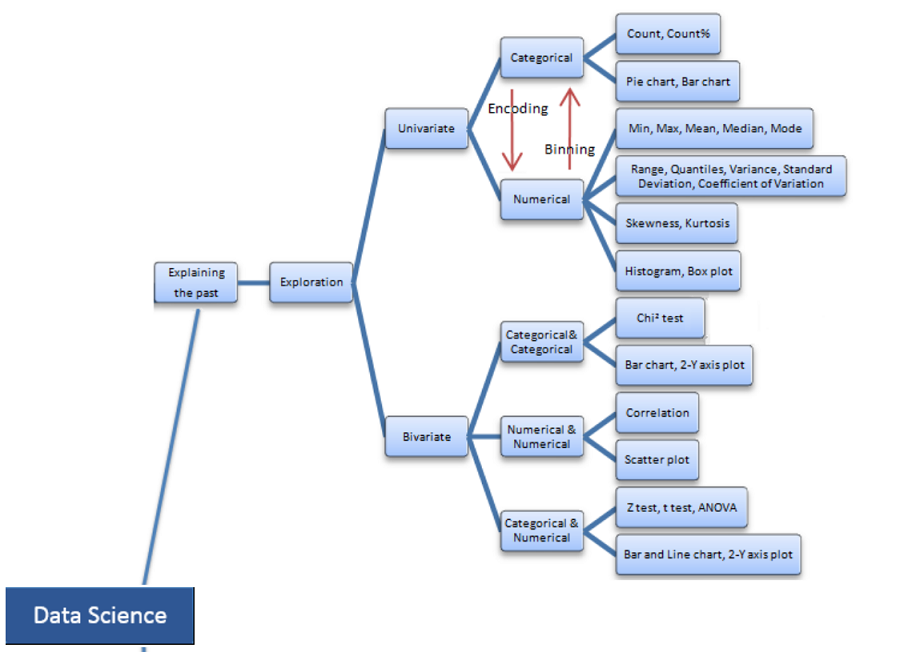

In [43]:
# contoh sederhana
import numpy as np

# membuat variable data
x = np.array([10.00, 8.00, 13.00, 9.00, 11.00, 14.00, 6.00, 4.00, 12.00, 7.00, 5.00])
y = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

# menjadikan data tersebut sebagai dataframe
dataset = pd.DataFrame({'x': x, 'y': y}, columns = ['x', 'y'])

# print dataset
dataset

,x,y
0,10.0,8.04
1,8.0,6.95
2,13.0,7.58
3,9.0,8.81
4,11.0,8.33
5,14.0,9.96
6,6.0,7.24
7,4.0,4.26
8,12.0,10.84
9,7.0,4.82


In [44]:
# melihat statistik sederhana dari dataset
dataset.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


<AxesSubplot:>

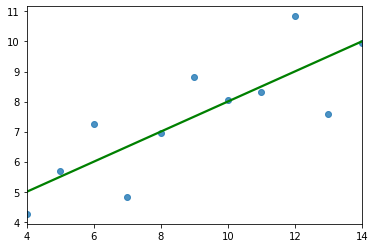

In [45]:
# EDA menggunakan scatter plot
import seaborn as sns

sns.regplot(x, y, ci=None, line_kws={'color': 'green'})

[Knowlegde tambahan](https://www.itl.nist.gov/div898/handbook/eda/section1/eda16.htm):
1. Data yang ada tersebar di linear curve
2. Tidak ada outlier

## EDA dengan D-Tale

> [D-Tale](https://pypi.org/project/dtale/) is the combination of a Flask back-end and a React front-end to bring you an easy way to view & analyze Pandas data structures.

Keunggulannya:
1. Mudah digunakan.
2. Terintegrasi dengan ipython notebooks dan python/ipython terminals.
3. Sudah support DataFrame, Series, MultiIndex, DatetimeIndex & RangeIndex.

In [46]:
df_titanic = pd.read_csv('titanic.csv')

In [47]:
import dtale
dtale.show(df_titanic)

Hal yang akan kita eksplore menggunakan dtale.
1. Describe, Histogram, Categories, [Q-Q plot](https://towardsdatascience.com/q-q-plots-explained-5aa8495426c0)
2. Cek outlier
3. Cek korelasi antara kolom
4. Cek missing value
5. Charts (mirip dengan point 1)

## EDA dan Manipulasi dengan Bamboolib

In [ ]:
import bamboolib as bam
df_titanic

# Missing Value and Outlier

Hasil EDA menunjukkan fakta berikut:
1. Terdapat missing value pada kolom ```Age```, ```Cabin```, ```Embarked```.
2. Outlier pada kolom ```Fare```.

## Penanganan Missing Value

Kenapa masalah Missing Value harus kita atasi?

> Missing values are common occurrences in data. Unfortunately, most predictive modeling techniques cannot handle any missing values. Therefore, this problem must be addressed prior to modeling.

Feature Engineering and Selection, 2019.

3 Tipe [Missing Value](https://blog.usejournal.com/missing-data-its-types-and-statistical-methods-to-deal-with-it-5cf8b71a443f):
1. Missing completely at random (MCAR). 
2. Missing at random (MAR). 
3. Missing not random (MNAR). 

<details>
<br>
Misal kita diminta untuk membuat model dari Age (Y) yang dipengaruhi oleh jenis kelamin (X) beberapa responden tidak memberikan jawaban atas pertanyaan berapa berat mereka. <br>
1. MCAR terjadi jika tidak ada alasan yang jelas kenapa responden tidak memberikan jawaban.<br>
2. MAR terjadi jika orang yang berjenis kelamin perempuan akan cenderung tidak memberikan jawaban jika ditanya berat, jadi missing value Y dipengaruhi oleh X.<br>
3. MNAR terjadi jika orang dengan kelas penghasilan tertentu, memiliki kecenderungan tidak memberikan jawaban. Sehingga missing value Y dipengaruhi oleh nilai lain yang tidak teramati.
</details>

Beberapa fungsi utama yang digunakan:
1. [library ```missingno```](https://github.com/ResidentMario/missingno)
2. [```df.isnull()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html)
3. [```df.fillna()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
4. [```df.groupby()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)
5. [```df.loc()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html)
6. [```df.column.plot()```](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html)
7. [```df.column.skew()```](https://pandas.pydata.org/docs/reference/api/pandas.Series.skew.html)
8. [```df.column.value_counts()```](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)

In [48]:
# lihat missing value dengan fungsi .isnul()
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

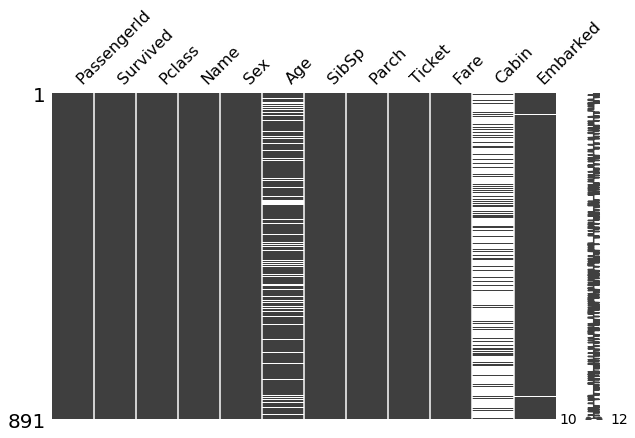

In [49]:
# visualiasi missing value dengan bantuan library
import missingno as msno
msno.matrix(df_titanic, figsize=(10, 6))

> Pertanyaan: missing value itu __dihapus__ atau bagaimana?

### Kolom Age

__Imputasi dengan mean atau median (Univariate)__ <br>

Metode pertama yang kita implementasikan adalah mengisi missing value dengan mean atau median berdasarkan perhitungan keseluruhan kolom ```Age``` saja.<br>

Hasilnya kita dapat memperhasikan efek yang berbeda dari pengisian tersebut dengan metode tersebut.

__Sebelum imputasi__

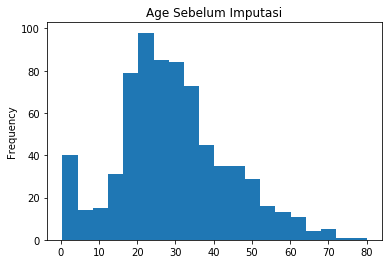

In [50]:
# melihat distribusi awal dari kolom Age
df_titanic.Age.plot.hist(title="Age Sebelum Imputasi", bins=20)

In [51]:
# melihat kecondongan distribusi kolom Age. Kecondongan yang baik itu dari -1 sampai dengan 1
df_titanic.Age.skew()

0.38910778230082704

In [52]:
df_titanic.Age.mean()

29.69911764705882

In [53]:
df_titanic.Age.median()

28.0

__Imputasi__

In [54]:
# fungsi fillna di pandas dapat digunakan untuk imputasi missing values
# taruh hasilnya di variable baru untuk mempermudah pengamatan
df_titanic['Age_mean_uni'] = df_titanic.Age.fillna(df_titanic.Age.mean())
df_titanic['Age_median_uni'] = df_titanic.Age.fillna(df_titanic.Age.median())

__Setelah imputasi__

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000250F8C82888>,
      dtype=object)

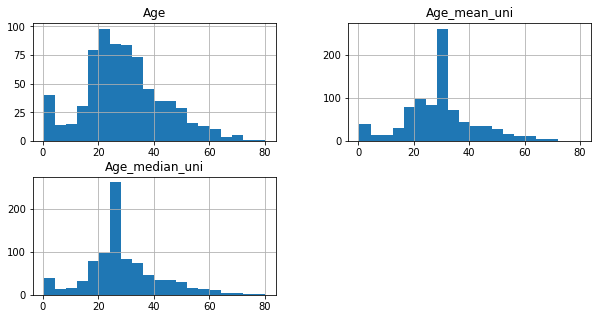

In [55]:
# melihat histogram sebelum dan sesudah imputasi 
df_titanic[['Age', 'Age_mean_uni','Age_median_uni']].hist(bins=20, figsize=(10,5))

In [56]:
# skewness sebelum dan sesudah imputasi
df_titanic[['Age', 'Age_mean_uni','Age_median_uni']].skew()

Age               0.389108
Age_mean_uni      0.434488
Age_median_uni    0.510245
dtype: float64

__Imputasi dengan Mean berdasarkan kelompok/parameter lain (Multivariate)__ <br>

Solusi alternatif jika kita ingin melakukan imputasi missing value, dibandingkan kita memukul rata isian missing value pada kolom ```Age``` dengan mean atau median dari seluruh data. <br>

Kita bisa mengelompokan terlebih dahulu berdasarkan kolom lain (dalam hal ini adalah ```Sex``` sehingga imputasi dilakukan terhadap kelompok yang sama sehingga diharapkan hasilnya lebih <i>smooth</i>.

__Sebelum imputasi__

In [57]:
# mengetahui mean per kelompok sex, kita menggunakan groupby
df_grouped = df_titanic[['Sex', 'Age']].groupby(['Sex']).mean()
df_grouped

,Age
Sex,
female,27.915709
male,30.726645


__Imputasi__

Setelah mengetahui mean dari masing-masing group, kita bisa melakukan imputasi.

In [58]:
# imputasi untuk male group

# filter kondisi 
condition = df_titanic['Sex'] == 'male'

# tangkap nilai mean untuk laki2
mean_male = df_grouped.loc['male','Age']

# imputasi
df_titanic.loc[condition, 'Age_mean_multi'] = df_titanic.loc[condition,'Age'].fillna(mean_male)

In [59]:
# proses untuk female sama seperti diatas
condition = df_titanic['Sex'] == 'female'
mean_female = df_grouped.loc['female','Age']
df_titanic.loc[condition, 'Age_mean_multi'] = df_titanic.loc[condition,'Age'].fillna(mean_female)

__Setelah imputasi__

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000250F8FC6688>,
      dtype=object)

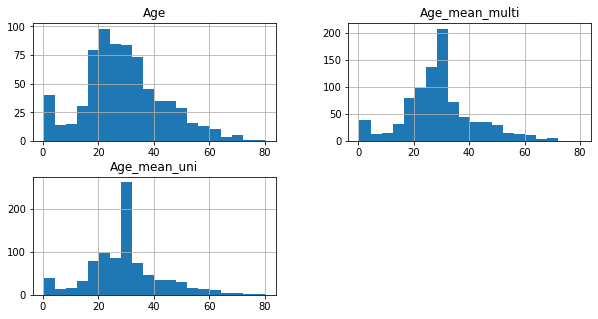

In [60]:
# melihat histogram sebelum dan sesudah imputasi 
df_titanic[['Age', 'Age_mean_uni','Age_mean_multi']].hist(bins=20, figsize=(10,5))

In [61]:
# skewness sebelum dan sesudah imputasi
df_titanic[['Age', 'Age_mean_uni','Age_mean_multi']].skew()

Age               0.389108
Age_mean_uni      0.434488
Age_mean_multi    0.424586
dtype: float64

__Simpulan__: Melihat hasil skewness dari ```Age_mean_multi``` yang cukup bagus (mendekati 0), kita memilih hasil ini untuk digunakan sebagai parameter bantu pada analisis selanjutnya. 

Namun dibuka kemungkinan apabila saat implementasi model, peforma dari model masih tidak sesuai harapan, ```Age_mean_multi``` dapat diganti dengan ```Age_mean_uni```.

### Kolom Cabin

Pada kolom ```Cabin``` dikarenakan mayoritas data adalah missing value dan kita punya tidak cukup ide untuk mengisinya. 

Apabila kita paksa imputasi akan sangat bias dan tidak bisa menggambarkan situasi sebenarnya.  

Maka, solusinya kolom ```cabin``` lebih baik dihilangkan menggunakan fungsi ```.drop()```.

In [62]:
df_titanic.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [63]:
# drop kolom menggunakan fungsi .drop()
df_titanic.drop(columns='Cabin', inplace = True)

In [64]:
# cek sisa kolom
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Age_mean_uni', 'Age_median_uni',
       'Age_mean_multi'],
      dtype='object')

__Simpulan__: Kolom ```Cabin``` sudah tidak lagi menjadi fitur dalam pengembangan model.

### Kolom Embarked

In [65]:
# cek value counts (size masing-masing kelas)
df_titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [66]:
# cek detail data yang kosong
df_titanic[df_titanic.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,38.0,38.0,38.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,62.0,62.0,62.0


In [67]:
df_titanic.Ticket

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

Kita bisa membuat dugaan awal bahwa kolom ```Embarked``` ini mungkin ada kaitannya dengan kolom lain yakni ```Ticket```. 

Untuk itu lakukan penelusuran, apakah ada nomor tiket dengan pola sejenis dengan data hilang.

In [68]:
# polanya di cek dengan fungsi .match
# pola yang digunakan adalah cari tiket yang diawali dengan '113'

df_titanic[(df_titanic.Ticket.str.match('^113'))].sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi
724,725,1,1,"Chambers, Mr. Norman Campbell",male,27.0,1,0,113806,53.10,S,27.0,27.0,27.0
708,709,1,1,"Cleaver, Miss. Alice",female,22.0,0,0,113781,151.55,S,22.0,22.0,22.0
809,810,1,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",female,33.0,1,0,113806,53.10,S,33.0,33.0,33.0


In [69]:
# Cek tiket dengan nomor yang sama df_titanic[(df_titanic.Ticket== '113776)]

In [70]:
# cek distribusi count tiket dengan pola str '113'
df_titanic[df_titanic.Ticket.str.match('^113')].Embarked.value_counts()

S    41
C     4
Name: Embarked, dtype: int64

Dari distribusinya tiket dengan nomor seri 113, memiliki probabilitas lebih tinggi bahwa penumpang naik dari pelabuhan ```S```.

In [71]:
# kita bisa menggunakan modus dari distribusinya, yaitu 'S'
# implementasi menggunakan fungsi .fillna()
df_titanic.Embarked.fillna('S', inplace = True)

In [72]:
# cek setelah implementasi
df_titanic.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

__Simpulan__: Hasil imputasi missing values pada kolom ```Embarked```, menambah jumlah kategori ```S``` dari 644 ke 646.

## Penanganan Outlier

Sumber:

1. https://www.mikulskibartosz.name/outlier-detection-with-scikit-learn/
2. https://www.kaggle.com/kevinarvai/outlier-detection-practice-uni-multivariate
3. https://nitin9809.medium.com/outlier-detection-and-treatment-part-1-aa0b09f60e50

Beberapa fungsi dan library yang digunakan:
1. library [```DBSCAN```](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html).
2. library [```MinMaxScaler```](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing).
3. [```df.quantile()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html).
4. [```df.mean()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html).
5. [```df.fillna()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html?highlight=fillna#pandas.DataFrame.fillna).
5. dst.

### Deteksi outlier secara univariate

__Box plot__

Jarak antar bagian di box menunjukkan derajat dispersi (penyebaran) dan skewness (kecondongan) dalam data. 

Bagian dari box adalah bidang yang menyajikan __interquartile range (IQR)__.

Panjang box ditentukan oleh IQR ini.

Semakin tinggi (jika boxplot vertikal) atau semakin lebar (jika boxplot horizontal) bidang IQR ini, menunjukkan data semakin menyebar.

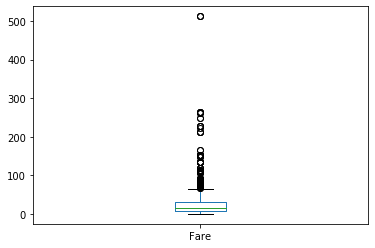

In [73]:
df_titanic.Fare.plot.box()

**Interquartile range**

IQR mendeskripsi bagian tengah atau 50% dari nilai jika diurutkan dari terendah ke tertinggi.

Untuk mendapatkan nilai IQR, langkah pertama adalah menemukan ```median``` dari ```batas bawah (Q1)``` dan ```batas atas (Q3)``` dari distribusi data.

IQR adalah beda antara Q3 dan Q1.

Kemudian setelah mendapatkan IQR, kita akan menghitung whisker minimal (iqr_lower) dan maksimal (iqr_upper).

Nilai diluar iqr_lower dan iqr_upper adalah outlier.


<details>

Penjelasan IQR
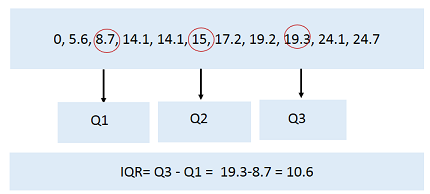
    
Hubungan IQR pada Box plot
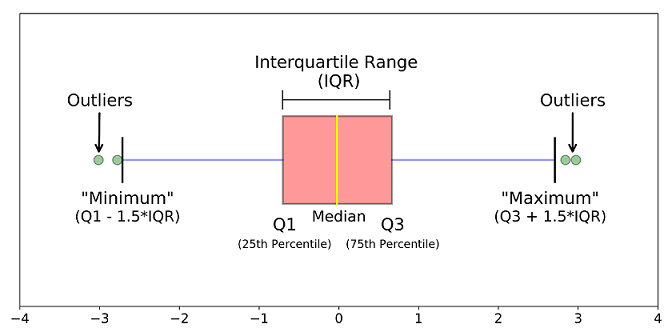
</details>

In [74]:
# menghitung Q1 dan Q3
q1 = df_titanic['Fare'].quantile(0.25)
q3 = df_titanic['Fare'].quantile(0.75)

# menghitung IQR
iqr = q3 - q1

# menghitung batas bawah dan batas atas
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr

In [75]:
# print hasil
(iqr_lower, iqr_upper)

(-26.724, 65.6344)

In [76]:
# contoh outlier dengan nilai kurang dari iqr_lower
df_titanic[df_titanic.Fare < iqr_lower]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi


In [77]:
# contoh outlier dengan nilai lebih dari iqr_upper
df_titanic[df_titanic.Fare > iqr_upper].sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi
665,666,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.500,S,32.0,32.0,32.0
655,656,0,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.500,S,24.0,24.0,24.0
659,660,0,1,"Newell, Mr. Arthur Webster",male,58.0,0,2,35273,113.275,C,58.0,58.0,58.0


In [78]:
(df_titanic.Fare > iqr_upper).sum()

116

Apa yang harus kita lakukan, pilihan opsinya:
1. Membuang outlier tersebut.
2. Melakukan imputasi nilai. 

Disini kami contohkan untuk melakukan imputasi menggunakan mean.

In [79]:
# ganti nilai outliner dengan na sehingga menjadi missing value
df_titanic['Fare_iqr'] = df_titanic['Fare']
df_titanic.loc[df_titanic['Fare_iqr'] < iqr_lower, 'Fare_iqr'] = pd.NA
df_titanic.loc[df_titanic['Fare_iqr'] > iqr_upper, 'Fare_iqr'] = pd.NA

In [80]:
# cek implementasi missing value
df_titanic.Fare_iqr.isna().sum()

116

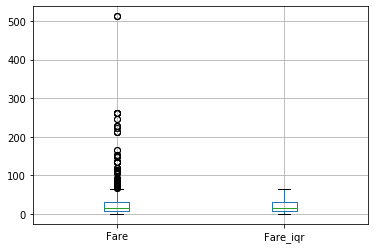

In [81]:
# imputasi NaN dengan mean
df_titanic['Fare_iqr'].fillna(df_titanic.Fare.mean(),inplace=True)

# tampilkan box plot
df_titanic[['Fare','Fare_iqr']].boxplot()

__Simpulan__: Perlu kehati-hatian dalam mengimplementasikan metode IQR. IQR dapat digunakan apabila sebaran data kita sempit.

### Deteksi outlier secara multivariate

Deteksi outlier bedasarkan pengamatan terhadap lebih dari 1 features biasa dikenal dengan multivariate outlier detections. 

Dalam kasus ini kita coba mengkoreksi data outlier ```Fare``` dengan bantuan dari variable lain yakni ```Age```.

Kemudian kita melihat apakah ada outlier dengan melihat kerapatan data menggunakan metode [__Density-Based Spatial Clustering of Applications with Noise (DBSCAN)__](https://towardsdatascience.com/dbscan-with-python-743162371dca).
> Metode clustering menggunakan machine learning untuk memisahkan cluster dengan density tinggi dari cluster dengan density rendah.

__Sebelum imputasi__

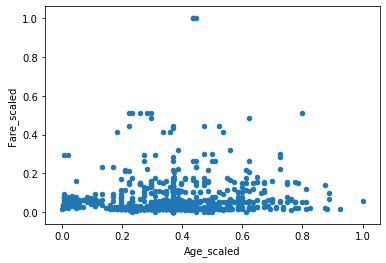

In [82]:
# load dictionary
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN

# lakukan standarisasi data agar skalanya sama
scaler = MinMaxScaler()
df_titanic['Fare_scaled'] = scaler.fit_transform(df_titanic[['Fare']])
df_titanic['Age_scaled'] = scaler.fit_transform(df_titanic[['Age_mean_uni']])

# visualisasikan dua features ini dalam bentuk scatter
df_titanic.plot.scatter(y = 'Fare_scaled', x = 'Age_scaled')

<details>

Penjelasan parameter:
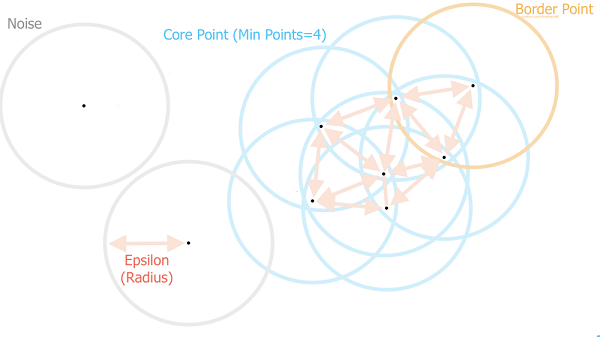
</details>

In [83]:
DBSCAN_model = DBSCAN(eps = 0.5, metric = 'euclidean', min_samples = 3, n_jobs = -1)

# fit model
clusters = DBSCAN_model.fit_predict(df_titanic[['Fare_scaled', 'Age_scaled']])

# simpan hasil clustering ke kolom baru
df_titanic['Is_outlier'] = clusters

# hasil cluster akan ada dua 0 tidak outlier, 1 merupakan outlier
# pd.Series(clusters).value_counts() ==> cek

In [84]:
df_titanic.Is_outlier.value_counts()

0    888
1      3
Name: Is_outlier, dtype: int64

In [85]:
# lookup data yang outlier
df_titanic[df_titanic['Is_outlier']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi,Fare_iqr,Fare_scaled,Age_scaled,Is_outlier
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,35.0,35.0,35.0,32.204208,1.0,0.434531,1
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,36.0,36.0,36.0,32.204208,1.0,0.447097,1
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,35.0,35.0,35.0,32.204208,1.0,0.434531,1


__Imputasi dengan Mean dari kolom Fare saja__

In [86]:
# membuat satu kolom baru yang isinya sama dengan Fare
df_titanic['Fare_dbscan'] = df_titanic['Fare']

In [87]:
# dapatkan mean dari Fare
fare_mean = df_titanic[df_titanic['Is_outlier']==0].Fare.mean()

# isikan nilai mean ke nilai outlier
df_titanic.loc[df_titanic['Is_outlier']==1, 'Fare_dbscan'] = fare_mean

__Setelah imputasi__

In [88]:
#pengecekan nilai Fare_dbscan
df_titanic.loc[df_titanic['Is_outlier']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi,Fare_iqr,Fare_scaled,Age_scaled,Is_outlier,Fare_dbscan
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,35.0,35.0,35.0,32.204208,1.0,0.434531,1,30.582164
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,36.0,36.0,36.0,32.204208,1.0,0.447097,1,30.582164
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,35.0,35.0,35.0,32.204208,1.0,0.434531,1,30.582164


__Imputasi dengan Mean hasil analisis dari kolom Embarked__

Sebagaimana kita ketahui bahwa hasil deteksi outlier di atas, kesemuanya berangkat dari pelabuhan C dengan seri ```Ticket``` yang sama. 

Dibandingkan menggunakan mean dari seluruh penumpang, kita bisa coba gunakan mean dari penumpang lain dari kelompok pemberangkatan ```Embarked``` yang sama.

In [89]:
df_titanic.loc[df_titanic['Is_outlier']==0, ['Fare','Embarked']].groupby(by='Embarked').agg(['describe'])

Fare                                                           \
         describe                                                            
            count       mean        std     min      25%      50%      75%   
Embarked                                                                     
C           165.0  51.729143  57.953950  4.0125  13.4167  28.7125  76.7292   
Q            77.0  13.276030  14.188047  6.7500   7.7500   7.7500  15.5000   
S           646.0  27.243651  35.952905  0.0000   8.0500  13.0000  27.9000   

                   
                   
              max  
Embarked           
C         262.375  
Q          90.000  
S         263.000

In [90]:
# isikan ke nilai outlier yang sudah jadi NA
fare_mean_C = df_titanic[(df_titanic['Is_outlier'] == 0) & (df_titanic['Embarked'] == 'C')].Fare.mean()
df_titanic.loc[df_titanic['Is_outlier']==1, 'Fare_dbscan'] = fare_mean_C

In [91]:
#pengecekan nilai Fare_dbscan
df_titanic.loc[df_titanic['Is_outlier']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi,Fare_iqr,Fare_scaled,Age_scaled,Is_outlier,Fare_dbscan
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,35.0,35.0,35.0,32.204208,1.0,0.434531,1,51.729143
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,36.0,36.0,36.0,32.204208,1.0,0.447097,1,51.729143
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,35.0,35.0,35.0,32.204208,1.0,0.434531,1,51.729143


__Jika kita mengasumsikan terjadi salah ketik di nama tiket__

Dari deskripsi statistik masing-masing group ```Embarked``` mean untuk data ```Fare``` penumpang yang berangkat dari pelabuhan C memiliki mean di nilai ```51.73```. 

Kita dapat juga berasumsi bahwa outlier ```512.3292``` itu bisa jadi typo dan mungkin maksudnya ```51.2329```

In [92]:
# langsung koreksi 
# df_titanic.loc[df_titanic['Is_outlier']==1, 'Fare_dbscan'] = 51.2329

__Simpulan__: Untuk mempertajam analisis kita saat mendeteksi outlier, kita bisa menggunakan kolom lain sebagai fitur tambahan dan mengimplementasikannya menggunakan DBSCAN.

Kita menggunakan kolom Ticket sebagai fitur yang dapat membantu kita mendeteksi outlier pada kolom Fare.

# Feature Enginering 

Dari hasil sementara EDA, tanamkan hal berikut di pikiran kita:
1. Apakah ada kemungkinan untuk mendapatkan tambahan informasi atau mengurangi noise dari datanya.
2. Bisakah kita mengkombinasikan data dalam bentuk berbeda, sehingga menjadi lebih informatif.
3. Adakah kemungkinan kita untuk menggunakan data tambahan dari eksternal.

Sumber: https://towardsdatascience.com/what-is-feature-engineering-bfd25b2b26b2

Kunci: __KREATIF !__

## Ekstraksi inisial dari kolom Name sebagai fitur

Jika kita telusuri di kolom name akan terlihat bahwa kolom ini adalah kolom yang sangat unit dengan tingkat cardinality yang tinggi. 

Beberapa dari kita mungkin akan melakukan drop terhadap kolom ini.

Namun jika bisa lebih teliti, ada satu pola yang kita bisa ekstrak dan memberikan nilai tambah pada dataset kita.

Dalam hal ini, kita akan melakukan ekstraksi gelar sosial pada nama seperti Mr. Miss. Mrs. sebagai menggunakan regex.

Beberapa fungsi dan library yang digunakan:
1. [```RegEx```](https://docs.python.org/3/howto/regex.html).
2. ```df.column.replace()```.
3. ```df.column.value_counts()```
4. Library [```One Hot Encoder```](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).
5. dst.

In [93]:
df_titanic[['Name']].sample(5)

,Name
156,"Gilnagh, Miss. Katherine ""Katie"""
632,"Stahelin-Maeglin, Dr. Max"
133,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)"
310,"Hays, Miss. Margaret Bechstein"
394,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt..."


In [94]:
# extract gelar pada nama menggunakan regex dan simpan ke kolom baru
df_titanic['Initial'] = df_titanic.Name.str.extract('(\w+)\.')

In [95]:
# cek distribusi count
df_titanic.Initial.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Mme           1
Don           1
Countess      1
Jonkheer      1
Capt          1
Lady          1
Sir           1
Ms            1
Name: Initial, dtype: int64

In [96]:
# melakukan perbaikan atas inisial yang munkin salah tulis, atau tidak sesuai kriteria
# menggunakan fungsi .replace()

replace_dict =  {'Mlle': 'Miss',
                 'Mme': 'Miss',
                 'Ms': 'Miss',
                 'Dr': 'Mr',
                 'Major': 'Mr',
                 'Lady': 'Mrs',
                 'Countess': 'Mrs',
                 'Jonkheer': 'Other',
                 'Col': 'Other',
                 'Rev': 'Other',
                 'Capt': 'Mr',
                 'Sir': 'Mr',
                 'Don': 'Mr'}

df_titanic['Initial'].replace(replace_dict,inplace=True)

In [97]:
# cek distribusi count setelah perbaikan

df_titanic.Initial.value_counts()

Mr        529
Miss      186
Mrs       127
Master     40
Other       9
Name: Initial, dtype: int64

__Simpulan__: Telah diekstraksi data dari kolom Name menjadi informasi yang bernilai tambah, dan disimpan pada kolom Initial.

## Pengelompokan penumpang berdasarkan kolom Age (Binning)

[Binning](https://towardsdatascience.com/data-preprocessing-with-python-pandas-part-5-binning-c5bd5fd1b950) adalah teknik mengkonversi data numerical menjadi categorical, dengan menggunakan range.

Fungsi yang digunakan, [```pd.cut()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html).

Misalkan:

|Age|Category|
|--- |--- |
|0-15|child|
|16-30|young_adult|
|31-50|adult|
|>50|elderly|

In [98]:
# membuat varible baru bernama cut_points
# merupakan batas dari setiap kategori
cut_points = [0, 15, 30, 50, 100]

# membuat label atas kategorinya
age_label = ['child', 'young_adult', 'adult', 'elderly']

# implementasi label tersebut dengan membuat kolom baru bernama age_label
df_titanic['Age_group'] = pd.cut(df_titanic['Age_mean_uni'], bins=cut_points, labels=age_label, include_lowest=True)

In [99]:
# print hasil implementasi
df_titanic.sample(3)[['Age_group','Age_mean_uni']]

,Age_group,Age_mean_uni
495,young_adult,29.699118
42,young_adult,29.699118
99,adult,34.000000


__Simpulan__: Telah dikategorikan range ```Age``` pada kolom ```Age_group```.

## Encoding

Beberapa fungsi dan library yang digunakan:
1. library [```LabelEncoder```](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).
2. dictionary ```{}```.
3. [```df.Series.map()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html).
4. dst.

### Kolom Sex

Label encoding digunakan untuk mengubah data categorical menjadi nominal. 

In [100]:
# cek ada berapa label pada kolom sex
df_titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

Karena hanya ada 2 distinct values (low cardinality), kita cukup pakai dictionary untuk labeling.

In [101]:
# membuat dictionary, 0 untuk male dan 1 untuk female
label_sex = {'male':0,'female':1}

# gunakan fungsi map pada pandas untuk mengaplikasikan labeling
df_titanic['Sex_enc'] = df_titanic['Sex'].map(label_sex)

# print hasil implementasi
df_titanic[['Name','Sex','Sex_enc']].sample(3)

,Name,Sex,Sex_enc
686,"Panula, Mr. Jaako Arnold",male,0
874,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,1
225,"Berglund, Mr. Karl Ivar Sven",male,0


__Simpulan__: kategori male dan female sudah berubah menjadi 0 dan 1.

### Kolom Embarked

Jika jumlah kelas pada variabel kategori sangat banyak (high cardinality).

Kita __tidak mungkin melakukannya secara manual__ menggunakan dictionary. 

Oleh karenanya kita perlu menggunakan bantuan library salah satunya adalah [Label Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) di scikit learn.

In [102]:
# load library
from sklearn.preprocessing import LabelEncoder

# inisiasi encoder
le = LabelEncoder()

# fiting dan transform ke model
df_titanic['Embarked_enc'] = le.fit_transform(df_titanic['Embarked'])

In [103]:
# print hasil implementasi
df_titanic[['Name','Embarked','Embarked_enc']].sample(3)

,Name,Embarked,Embarked_enc
715,"Soholt, Mr. Peter Andreas Lauritz Andersen",S,2
416,"Drew, Mrs. James Vivian (Lulu Thorne Christian)",S,2
698,"Thayer, Mr. John Borland",C,0


__Simpulan__: kategori C, Q, dan S sudah berubah menjadi 0, 1 dan 2.

### Kolom Initial

Dari hasil ekstraksi fitur, kita memperoleh lima jenis kategorikal.

Sebelumnya kita sudah kenal cara melakukan encoding dengan menggunakan dictionary dan LabelEncoder.

Untuk kali ini akan kita implementasikan satu teknik lainnya, yaitu One Hot Encoding.

__Kenapa kita menggunakannya?__

Label Encoding adalah kategori sekarang memiliki [urutan (natural order)](https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/). 

Komputer secara alami akan memberikan angka yang lebih tinggi, bobot yang lebih tinggi. 

Untuk mengatasinya kita menggunakan One Hot Encoding.

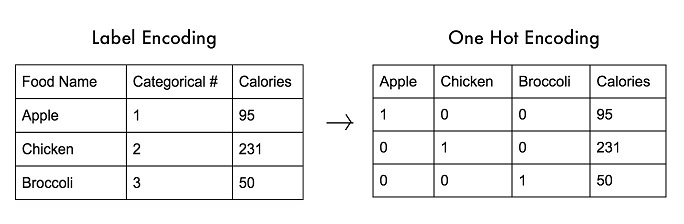

Sumber: https://medium.com/@michaeldelsole/what-is-one-hot-encoding-and-how-to-do-it-f0ae272f1179

In [104]:
# load library 
from sklearn.preprocessing import OneHotEncoder 

# inisiasi encoder 
ohc = OneHotEncoder(handle_unknown='ignore')

# fit dan transform
new_features = ohc.fit_transform(df_titanic[['Initial']])

# masukan ke dataframe hasilnya
cols_name= [x for x in df_titanic['Initial'].unique()]
df_initial_ohc = pd.DataFrame(new_features.toarray(), columns=cols_name)

df_initial_ohc.sample(3)

,Mr,Mrs,Miss,Master,Other
761,0.0,0.0,1.0,0.0,0.0
533,0.0,0.0,0.0,1.0,0.0
288,0.0,0.0,1.0,0.0,0.0


In [105]:
# gabung hasilnya ke df_titanic
df_titanic = pd.concat([df_titanic, df_initial_ohc], axis=1)

In [106]:
# print hasil implementasi
df_titanic.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Fare_dbscan,Initial,Age_group,Sex_enc,Embarked_enc,Mr,Mrs,Miss,Master,Other
824,825,0,3,"Panula, Master. Urho Abraham",male,2.0,4,1,3101295,39.6875,...,39.6875,Master,child,0,2,1.0,0.0,0.0,0.0,0.0
836,837,0,3,"Pasic, Mr. Jakob",male,21.0,0,0,315097,8.6625,...,8.6625,Mr,young_adult,0,2,0.0,0.0,1.0,0.0,0.0
667,668,0,3,"Rommetvedt, Mr. Knud Paust",male,NaN,0,0,312993,7.7750,...,7.7750,Mr,young_adult,0,2,0.0,0.0,1.0,0.0,0.0


__Simpulan__: Sudah diimplementasikan OHE pada kolom ```Initial```.

### Kolom Age_group

Sama seperti sebelumnya, kita akan implementasikan OHE untuk kolom ```Age_group```.

In [107]:
# fit dan transform
new_features = ohc.fit_transform(df_titanic[['Age_group']])

# masukan ke dataframe hasilnya
cols_name= [x for x in df_titanic['Age_group'].unique()]
df_age_group_ohc = pd.DataFrame(new_features.toarray(), columns=cols_name)

df_age_group_ohc.sample(3)

,young_adult,adult,elderly,child
724,0.0,0.0,0.0,1.0
381,0.0,1.0,0.0,0.0
218,1.0,0.0,0.0,0.0


In [108]:
# gabung hasilnya ke df_titanic
df_titanic = pd.concat([df_titanic, df_age_group_ohc], axis=1)

In [109]:
# print hasil implementasi
df_titanic.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_enc,Mr,Mrs,Miss,Master,Other,young_adult,adult,elderly,child
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,...,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
243,244,0,3,"Maenpaa, Mr. Matti Alexanteri",male,22.0,0,0,STON/O 2. 3101275,7.1250,...,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
847,848,0,3,"Markoff, Mr. Marin",male,35.0,0,0,349213,7.8958,...,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


__Simpulan__: Sudah diimplementasikan OHE pada kolom ```Age_group```.

In [110]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Age_mean_uni', 'Age_median_uni',
       'Age_mean_multi', 'Fare_iqr', 'Fare_scaled', 'Age_scaled', 'Is_outlier',
       'Fare_dbscan', 'Initial', 'Age_group', 'Sex_enc', 'Embarked_enc', 'Mr',
       'Mrs', 'Miss', 'Master', 'Other', 'young_adult', 'adult', 'elderly',
       'child'],
      dtype='object')

In [111]:
columns_to_keep = ['Survived', 'Pclass', 'Fare_dbscan', 'Sex_enc', 'Embarked_enc', 'Mr',
                   'Mrs', 'Miss', 'Master', 'Other', 'young_adult', 'adult', 'elderly',
                   'child']

In [112]:
df_titanic = df_titanic[columns_to_keep]

In [113]:
df_titanic.head(3)

,Survived,Pclass,Fare_dbscan,Sex_enc,Embarked_enc,Mr,Mrs,Miss,Master,Other,young_adult,adult,elderly,child
0,0,3,7.2500,0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,71.2833,1,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1,3,7.9250,1,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
